<a href="https://colab.research.google.com/github/teftef6220/Stable_Diffusion_in_Colab/blob/main/Stable_diffusion_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab で動かす Stable Diffusion 

Github : 
https://github.com/teftef6220/Stable_Diffusion_in_Colab

使い方 :     
簡単に ... 使いたいモデルを設定して上から順番に再生ボタンを押していく。  
         詳しく ... https://note.com/te_ftef/n/nef42662c7c02


In [1]:
#@title mount to drive (ドライブにマウント)
from google.colab import drive
drive.mount('/content/drive')

!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Mounted at /content/drive
Tesla T4, 15109 MiB, 15109 MiB


In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy
from diffusers import StableDiffusionPipeline
from diffusers import DDIMScheduler
from diffusers import DPMSolverMultistepScheduler
from diffusers import LMSDiscreteScheduler
from diffusers import PNDMScheduler
from diffusers import EulerDiscreteScheduler
from diffusers import EulerAncestralDiscreteScheduler
from PIL.PngImagePlugin import PngInfo
import torch

#@title makedir (親フォルダを作成)
import os
new_dir_path = '/content/drive/MyDrive/Stable_Diffusion_output'
os.makedirs(new_dir_path,exist_ok=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-o93ly6mb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-o93ly6mb
  Resolved https://github.com/huggingface/diffusers.git to commit 0e98e83927da5f06e433e3990820145aaf90caf1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 118.5 MB/s eta 0:00:00
  Created wheel for diffusers: filename=dif

In [3]:
#@title  モデル選択 (モデルを変更するときはここ以下を実行してください)
#@markdown モデル選択
model_name= "7th_anime_v3_testA" #@param ["Stable Diffusion V1.5","Stable Diffusion V2.1","ACertainModel","Waifu Diffusion 1.4","Trinart Stable Diffusion V2","trinart_characters_19.2m_stable_diffusion_v1","Mitua Diffusion","Cyberpunk-Anime","Inkpunk-Diffusion","Van-Gogh-diffusion","cool-japan-diffusion-2-1-1","22h/vintedois-diffusion","dreamlike-diffusion-1.0","dreamlike-photoreal-2.0","linkedin-diffusion","openjourney-v1","openjourney-v2","timeless-diffusion","Protogen_x3.4_Official_Release","Evt_V4-preview","fantassified_icons","kawaiinimal-icons","halloween_diffusion","Counterfeit-V2.0","7th_anime_v3_testA"] {allow-input: false}
# model_id = "gsdf/counterfeit-v1.0" unet 実装待ち
# model_id = "RuminationDiffusion":"JosephusCheung/RuminationDiffusion"

model_dict={"Stable Diffusion V1.5":"runwayml/stable-diffusion-v1-5",
            "Stable Diffusion V2.1":"stabilityai/stable-diffusion-2-1",
            "ACertainModel":"JosephusCheung/ACertainModel",
            "Waifu Diffusion 1.4":"hakurei/waifu-diffusion",
            "Trinart Stable Diffusion V2":"naclbit/trinart_stable_diffusion_v2",
            "trinart_characters_19.2m_stable_diffusion_v1":"naclbit/trinart_characters_19.2m_stable_diffusion_v1",
            "RuminationDiffusion":"JosephusCheung/RuminationDiffusion",
            "Mitua Diffusion":"Mitsua/mitsua-diffusion-cc0",
            "Cyberpunk-Anime":"DGSpitzer/Cyberpunk-Anime-Diffusion",
            "Inkpunk-Diffusion":"Envvi/Inkpunk-Diffusion",
            "Van-Gogh-diffusion":"dallinmackay/Van-Gogh-diffusion",
            "cool-japan-diffusion-2-1-1":"aipicasso/cool-japan-diffusion-2-1-1",
            "22h/vintedois-diffusion":"22h/vintedois-diffusion-v0-1",
            "dreamlike-diffusion-1.0":"dreamlike-art/dreamlike-diffusion-1.0",
            "dreamlike-photoreal-2.0":"dreamlike-art/dreamlike-photoreal-2.0",
            "linkedin-diffusion":"prompthero/linkedin-diffusion",
            "openjourney-v1":"prompthero/openjourney",
            "timeless-diffusion":"wavymulder/timeless-diffusion",
            "openjourney-v2":"prompthero/openjourney-v2",
            "Protogen_x3.4_Official_Release":"darkstorm2150/Protogen_x3.4_Official_Release",
            "Evt_V4-preview":"haor/Evt_V4-preview",
            "fantassified_icons":"proxima/fantassified_icons",
            "kawaiinimal-icons":"proxima/kawaiinimal-icons",
            "halloween_diffusion":"proxima/halloween_diffusion",
            "Counterfeit-V2.0":"gsdf/Counterfeit-V2.0",
            "7th_anime_v3_testA":"syaimu/7th_test"
            }
model_id = model_dict[model_name]

print("creating pipeline ...")
print("loading model : ",model_name)

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16) 
pipe.enable_attention_slicing()
pipe.safety_checker = None
pipe = pipe.to("cuda")

# path_index=model_id.find("/")

import os
sub_dir_path = os.path.join('/content/drive/MyDrive/Stable_Diffusion_output',model_name)
os.makedirs(sub_dir_path,exist_ok=True)

import glob
print(sub_dir_path)
image_num_count=len(glob.glob(sub_dir_path+'/*.png'))
print(image_num_count)


creating pipeline ...
loading model :  7th_anime_v3_testA


Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/901 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

/content/drive/MyDrive/Stable_Diffusion_output/7th_anime_v3_testA
0


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

saiving...output_0001~output_0004.png


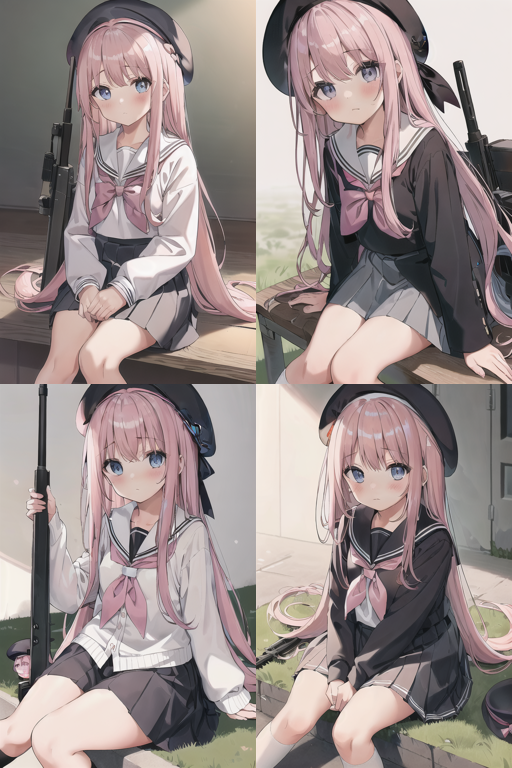

In [4]:
#@title  同じモデル内で画像生成するときは、ここを逐一実行する(生成しまくると画像がどんどんたまっていくので注意)

#@markdown Prompt入力
prompt = "((masterpiece, best quality)),a girl, hat, blush,long hair, skirt, beret, sitting, bangs, pink hair, light blue eyes, black headwear,rifle,weapon, looking at viewer, white sailor collar, school uniform, closed mouth, black hat, sailor collar, holding weapon, long sleeves, pleated skirt, white socks," #@param {type : "string"}

#@markdown Negative Prompt入力
n_prompt = "(low quality, worst quality:1.4), (bad anatomy), (inaccurate limb:1.2),bad composition, inaccurate eyes, extra digit,fewer digits,(extra arms:1.2)," #@param {type : "string"}

#@markdown 横の長さ(pix)入力 
width = "512" #@param[512,768,1024]

#@markdown 縦の長さ(pix)入力 
height = "768" #@param[512,768,1024]

#@markdown Scale数入力
scale = 8 #@param{type:"number"}

#@markdown Step数入力
steps = 28 #@param{type:"number"}

#@markdown Random Seed (-1はランダムシード)
seed = -1 #@param{type:"number"}

#@markdown 生成枚数 (平方数が好ましい)
num = "4" #@param[1,4,9,16]

#@markdown scheduler選択
scheduler= "DPMSolverMultistep" #@param ["PNDM", "DDIM", "DPMSolverMultistep", "LMSDiscrete", "EulerDiscrete", "EulerAncestralDiscrete"] {allow-input: false}

#@markdown メタデータ書き込み  (こだわらない場合はデフォルト)
how_to_embed = "Both" #@param["Default","Steganography","Both"]

import random
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image,display_png
from PIL import Image

def save_img(img,path,pnginfo):
  """
  save img
  """
  img.save(path,pnginfo=pnginfo)

def steganography(prompt,n_prompt,seed,img,image_save_path,metadata):
  """
  Embed prompt,n_prompt,seed, using steganography
  """
  txt=prompt+" : "+n_prompt+" : "+" seed :"+str(seed)
  # print(txt)
  rgba_img = img.convert('RGBA')
  size = rgba_img.size
  result = Image.new('RGBA',size)
  result.paste(rgba_img, (0, 0))

  flag = False
  cnt = 0
  for y in range(size[1]):
      for x in range(size[0]):

          r,g,b,a = rgba_img.getpixel((x,y))
          r = r // 3 * 3
          g = g // 4 * 4
          b = b // 5 * 5

          get_ord = ord(txt[cnt])
          #Rの処理
          # 空白 . ? 数字 a ~ g
          if get_ord == 32 or get_ord == 46 or get_ord == 63 \
              or (get_ord >= 48 and get_ord <= 57) \
              or (get_ord >= 97 and get_ord <= 103):
              r += 1
          # h ~ z or end(!)
          elif (get_ord >= 104 and get_ord <= 122) or get_ord == 33:
              r += 2
          #Gの処理
          # 2 ~ 6 m ~ q
          if (get_ord >= 50 and get_ord <= 54) \
              or (get_ord >= 109 and get_ord <= 113):
              g += 1
          # 7 ~ 9 a ~ b r ~ v
          elif (get_ord >= 55 and get_ord <= 57) \
              or get_ord == 97 or get_ord == 98 \
              or (get_ord >= 114 and get_ord <= 118):
              g += 2
          # c ~ g w ~ z
          elif (get_ord >= 99 and get_ord <= 103) \
              or (get_ord >= 119 and get_ord <= 122) \
              or get_ord == 33:
              g += 3
          #Bの処理
          if r % 3 == 1:
              # .
              if get_ord == 46: b += 1
              # ?
              elif get_ord == 63:b += 2
              # 数字
              elif (get_ord >= 48 and get_ord <= 57):
                  b += (get_ord - 45) % 5
              # a ~ g
              elif (get_ord >= 97 and get_ord <= 103):
                  b += (get_ord - 94) % 5
          elif r % 3 == 2:
              # h ~ z
              if get_ord >= 104 and get_ord <= 122:
                  b += (get_ord - 104) % 5
              # end(!)
              elif  get_ord == 33:
                  b += 4
          result.putpixel((x,y),(r,g,b,a))
          #終了処理
          if cnt == len(txt) - 1 or (r % 3 == 2 and g % 4 == 3 and b % 5 == 4):
              flag = True
              break
          if cnt < len(txt) - 1:
              cnt += 1
      if flag:
          break

  #画像の保存
  save_img(result,image_save_path,metadata)


def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True


# if(seed != -1):
#   torch_fix_seed(seed=seed)
# else:
#     torch.backends.cudnn.deterministic = False
#     torch.use_deterministic_algorithms = False

torch.backends.cudnn.deterministic = False
torch.use_deterministic_algorithms = False

##scheduler

if(scheduler == "PNDM"):
  pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "DDIM"):
  pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "DPMSolverMultistep"):
  pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "LMSDiscrete"):
  pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "EulerDiscrete"):
  pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "EulerAncestralDiscrete"):
  pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

img_num=int(num)
images=[]
pm=1
for num in range(img_num):
  if seed == -1:
    seed = random.randrange(0, 4294967295, 1)
  generator = torch.Generator("cuda").manual_seed(seed)
  tmp_img=pipe(prompt, negative_prompt=n_prompt, height=int(height), width=int(width),guidance_scale=scale, num_inference_steps=steps,).images[0]
  image_num_count+=1
  image_save_path=sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png"

  if how_to_embed == "Default":
      metadata = PngInfo()
      metadata.add_text("prompt",(prompt))
      metadata.add_text("n_prompt",(n_prompt))
      metadata.add_text("seed",(str(seed)))
      save_img(tmp_img,image_save_path,metadata)
      # tmp_img.save(sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png",pnginfo=metadata)
  elif how_to_embed == "Steganography" : 
      metadata=None
      steganography(prompt,n_prompt,seed,tmp_img,image_save_path,metadata)
  else:
      metadata = PngInfo()
      metadata.add_text("prompt",(prompt))
      metadata.add_text("n_prompt",(n_prompt))
      metadata.add_text("seed",(str(seed)))
      steganography(prompt,n_prompt,seed,tmp_img,image_save_path,metadata)

  images.append(tmp_img)

#make_image_tile
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w,h=w//2,h//2
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

# print(images)
print("saiving..."+"output_"+'{0:04d}'.format(int(image_num_count-int(num)))+"~"+"output_"+'{0:04d}'.format(int(image_num_count))+".png")

grid = image_grid(images, rows=int(np.sqrt(img_num)), cols=int(np.sqrt(img_num)))
#show img tile
grid

# ステガノグラフィ解析

In [ ]:
#@title  ファイル番号を入力 File Number (00～ではなく自然数で(Use natural Number))
from PIL import Image
#@markdown ファイル番号数入力
file_num = 21 #@param{type:"number"}

# img = Image.open(sys.argv[1])
img = Image.open(sub_dir_path+"/output_"+str(file_num).zfill(4)+".png")

print(type(img))
rgba_img = img.convert('RGBA')
size = rgba_img.size

flag = False
cnt = 0
for y in range(size[1]):
    for x in range(size[0]):

        r,g,b,a = rgba_img.getpixel((x,y))
        r = r % 3
        g = g % 4
        b = b % 5
        if r == 0:
            print(" ", end="")
        elif r == 1:
            if g == 0:
                if b == 0:
                    print(" ", end="")
                elif b == 1:
                    print(".", end="")
                elif b == 2:
                    print("?", end="")
                elif b == 3:
                    print("0", end="")
                elif b == 4:
                    print("1", end="")
            if g == 1:
                if b == 0:
                    print("2", end="")
                elif b == 1:
                    print("3", end="")
                elif b == 2:
                    print("4", end="")
                elif b == 3:
                    print("5", end="")
                elif b == 4:
                    print("6", end="")
            if g == 2:
                if b == 0:
                    print("7", end="")
                elif b == 1:
                    print("8", end="")
                elif b == 2:
                    print("9", end="")
                elif b == 3:
                    print("a", end="")
                elif b == 4:
                    print("b", end="")
            if g == 3:
                if b == 0:
                    print("c", end="")
                elif b == 1:
                    print("d", end="")
                elif b == 2:
                    print("e", end="")
                elif b == 3:
                    print("f", end="")
                elif b == 4:
                    print("g", end="")
        elif r == 2:
            if g == 0:
                if b == 0:
                    print("h", end="")
                elif b == 1:
                    print("i", end="")
                elif b == 2:
                    print("j", end="")
                elif b == 3:
                    print("k", end="")
                elif b == 4:
                    print("l", end="")
            if g == 1:
                if b == 0:
                    print("m", end="")
                elif b == 1:
                    print("n", end="")
                elif b == 2:
                    print("o", end="")
                elif b == 3:
                    print("p", end="")
                elif b == 4:
                    print("q", end="")
            if g == 2:
                if b == 0:
                    print("r", end="")
                elif b == 1:
                    print("s", end="")
                elif b == 2:
                    print("t", end="")
                elif b == 3:
                    print("u", end="")
                elif b == 4:
                    print("v", end="")
            if g == 3:
                if b == 0:
                    print("w", end="")
                elif b == 1:
                    print("x", end="")
                elif b == 2:
                    print("y", end="")
                elif b == 3:
                    print("z", end="")
                elif b == 4:
                    pass

        #終了処理
        if r == 2 and g == 3 and b == 4:
            flag = True
            print(" ")
            break
    if flag:
        break

<class 'PIL.PngImagePlugin.PngImageFile'>
  masterpiece  best quality   a girl  hat  blush long hair  skirt  beret  sitting  bangs  pink hair  light blue eyes  black headwear rifle weapon  looking at viewer  white sailor collar  school uniform  closed mouth  black hat  sailor collar  holding weapon  long sleeves  pleated skirt  white socks     low quality  worst quality 1.4    bad anatomy    inaccurate limb 1.2  bad composition  inaccurate eyes  extra digit fewer digits  extra arms 1.2      seed  736989216      


# メタデータ解析

In [ ]:
#@title  ファイル番号を入力 File Number (00～ではなく自然数で(Use natural Number))

#@markdown ファイル番号数入力
file_num = 21 #@param{type:"number"}

import sys
from PIL import Image
from PIL.PngImagePlugin import PngInfo

# img = Image.open(sys.argv[1])
img = Image.open(sub_dir_path+"/output_"+str(file_num).zfill(4)+".png")
# print(img.text['prompt'],img.text['n_prompt'],img.text['seed'])
print("Prompt: ",img.text['prompt'])
print("Negative Prompt: ",img.text['n_prompt'])
print("seedt: ",img.text['seed'])

Prompt:  ((masterpiece, best quality)),a girl, hat, blush,long hair, skirt, beret, sitting, bangs, pink hair, light blue eyes, black headwear,rifle,weapon, looking at viewer, white sailor collar, school uniform, closed mouth, black hat, sailor collar, holding weapon, long sleeves, pleated skirt, white socks,
Negative Prompt:  (low quality, worst quality:1.4), (bad anatomy), (inaccurate limb:1.2),bad composition, inaccurate eyes, extra digit,fewer digits,(extra arms:1.2),
seedt:  736989216


# img-to-img_beta (動くけど時間かかる)

image to image の実行はこちらから

In [ ]:
#@title make input dir (入力画像フォルダを作成)
import os
new_dir_path = '/content/drive/MyDrive/Stable_Diffusion_output/im2im_in'
os.makedirs(new_dir_path,exist_ok=True)

画像入力

/content/drive/MyDrive/Stable_Diffusion_output/im2im_in
の下に 画像を入れ、"input.png"と名前を変更してください。

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

#@title  image-to-image モデル選択 (モデルを変更するときはここ以下を実行してください)

model_name= "dreamlike-diffusion-1.0" #@param ["Stable Diffusion V1.5","Stable Diffusion V2.1","ACertainModel","Waifu Diffusion 1.4","Trinart Stable Diffusion V2","Mitua Diffusion","Cyberpunk-Anime","Inkpunk-Diffusion","Van-Gogh-diffusion","cool-japan-diffusion-2-1-0-beta","cool-japan-diffusion-2-1-0","cool-japan-diffusion-for-learning-2-0","22h/vintedois-diffusion","dreamlike-diffusion-1.0","dreamlike-photoreal-2.0","linkedin-diffusion","openjourney-v1","openjourney-v2","timeless-diffusion","Protogen_x3.4_Official_Release"] {allow-input: false}
# model_id = "gsdf/counterfeit-v1.0" unet 実装待ち
# model_id = "RuminationDiffusion":"JosephusCheung/RuminationDiffusion"

model_dict={"Stable Diffusion V1.5":"runwayml/stable-diffusion-v1-5",
            "Stable Diffusion V2.1":"stabilityai/stable-diffusion-2-1",
            "ACertainModel":"JosephusCheung/ACertainModel",
            "Waifu Diffusion 1.4":"hakurei/waifu-diffusion",
            "Trinart Stable Diffusion V2":"naclbit/trinart_stable_diffusion_v2",
            "RuminationDiffusion":"JosephusCheung/RuminationDiffusion",
            "Mitua Diffusion":"Mitsua/mitsua-diffusion-cc0",
            "Cyberpunk-Anime":"DGSpitzer/Cyberpunk-Anime-Diffusion",
            "Inkpunk-Diffusion":"Envvi/Inkpunk-Diffusion",
            "Van-Gogh-diffusion":"dallinmackay/Van-Gogh-diffusion",
            "cool-japan-diffusion-2-1-0-beta":"aipicasso/cool-japan-diffusion-2-1-0-beta",
            "cool-japan-diffusion-2-1-0":"aipicasso/cool-japan-diffusion-2-1-0",
            "cool-japan-diffusion-for-learning-2-0":"alfredplpl/cool-japan-diffusion-for-learning-2-0",
            "22h/vintedois-diffusion":"22h/vintedois-diffusion-v0-1",
            "dreamlike-diffusion-1.0":"dreamlike-art/dreamlike-diffusion-1.0",
            "dreamlike-photoreal-2.0":"dreamlike-art/dreamlike-photoreal-2.0",
            "linkedin-diffusion":"prompthero/linkedin-diffusion",
            "openjourney-v1":"prompthero/openjourney",
            "timeless-diffusion":"wavymulder/timeless-diffusion",
            "openjourney-v2":"prompthero/openjourney-v2",
            "Protogen_x3.4_Official_Release":"darkstorm2150/Protogen_x3.4_Official_Release"
            }
model_id = model_dict[model_name]

print("creating pipeline ...")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id)

#make subdir
import os
sub_dir_path = os.path.join('/content/drive/MyDrive/Stable_Diffusion_output',model_name)
os.makedirs(sub_dir_path,exist_ok=True)

import glob
print(sub_dir_path)
image_to_image_num_count=len(glob.glob(sub_dir_path+'/img2img_*.jpg'))
print(image_to_image_num_count)

creating pipeline ...


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/content/drive/MyDrive/Stable_Diffusion_output/Waifu Diffusion 1.4
1


  0%|          | 0/21 [00:00<?, ?it/s]

saiving...img2img_output_0001


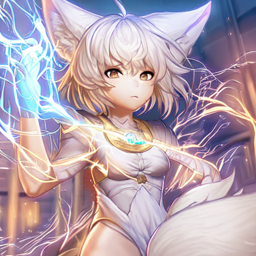

In [ ]:
#@title  image to image (beta) 2分ほどかかります。1ずつの実行です。

#@markdown Prompt入力
prompt = "masterpiece, best quality, 1girl, solo,fox ears,white short hair,magic" #@param {type : "string"}

#@markdown Negative Prompt入力
n_prompt = " lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry" #@param {type : "string"}

# #@markdown Scale数入力
# scale = 8 #@param{type:"number"}

# #@markdown Step数入力
# steps = 28 #@param{type:"number"}

#@markdown 相違度 (strength) 入力 
strength=0.75  #@param{type:"number"}         

#@markdown 類似度 (guidance scale) 入力
guidance_scale=7.5  #@param{type:"number"}    

#@markdown Random Seed (-1はランダムシード)
seed = -1 #@param{type:"number"}

#@markdown 生成枚数 
num = "1" #@param[1]

import random
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image,display_png
from PIL import Image
from torch import autocast


def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True

if(seed != -1):
  torch_fix_seed(seed=seed)
else:
    torch.backends.cudnn.deterministic = False
    torch.use_deterministic_algorithms = False


##@markdown scheduler選択
# scheduler= "DDIM" #@param ["PNDM", "DDIM", "DPMSolverMultistep", "LMSDiscrete", "EulerDiscrete", "EulerAncestralDiscrete"] {allow-input: false}

# if(scheduler == "PNDM"):
#   pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
# elif(scheduler == "DDIM"):
#   pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
# elif(scheduler == "DPMSolverMultistep"):
#   pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# elif(scheduler == "LMSDiscrete"):
#   pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
# elif(scheduler == "EulerDiscrete"):
#   pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
# elif(scheduler == "EulerAncestralDiscrete"):
#   pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)


img_num=int(num)
images=[]
pm=1
for num in range(img_num):

  input_image = Image.open('/content/drive/MyDrive/Stable_Diffusion_output/im2im_in/input.png').convert("RGB")#画像までのpath入力
  # print(type(input_image ))
  input_image = input_image.resize((512, 512))
  height,width= input_image.size
  # print(height,width)

  # print(type(input_image ))
  # prompt = "cat of ukiyoe style"
  # with autocast("cuda"):
  #     images = pipe(
  #         prompt=prompt,          # プロンプト
  #         input_image=init_image,  # 入力画像
  #         strength=0.75,          # 入力画像と出力画像と相違度 (0.0〜1.0)
  #         guidance_scale=7.5,     # プロンプトと出力画像の類似度　(7〜11)
  #         num_inference_steps=50, # 画像生成に費やすステップ数
  #         ).images
  with autocast("cuda"):
    tmp_img=pipe(prompt,init_image=input_image,strength=0.75,guidance_scale=7.5, num_inference_steps=steps).images[0]
  image_to_image_num_count+=1   
  tmp_img.save(sub_dir_path+"/img2img_output_"+'{0:04d}'.format(image_to_image_num_count)+".png")
  images.append(tmp_img)

#make_image_tile
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w,h=w//2,h//2
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

# print(images)
print("saiving..."+"img2img_output_"+'{0:04d}'.format(int(image_to_image_num_count-int(num))))

grid = image_grid(images, rows=int(np.sqrt(img_num)), cols=int(np.sqrt(img_num)))
#show img tile
grid

# Old Version

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

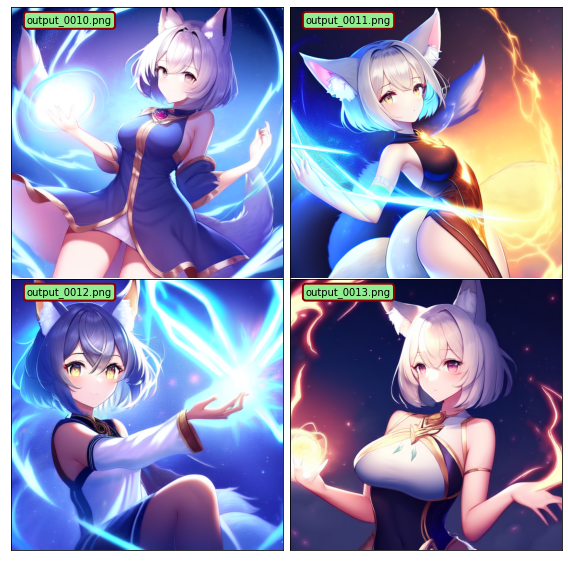

In [ ]:


#@markdown Prompt入力
prompt = "masterpiece, best quality, 1girl, solo,fox ears,white short hair,magic" #@param {type : "string"}

#@markdown Negative Prompt入力
n_prompt = " lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry" #@param {type : "string"}

#@markdown 縦の長さ(pix)入力 
height = "512" #@param[512,768,1024]

#@markdown 横の長さ(pix)入力 
width = "512" #@param[512,768,1024]

#@markdown Scale数入力
scale = 8 #@param{type:"number"}

#@markdown Step数入力
steps = 28 #@param{type:"number"}

#@markdown Random Seed (-1はランダムシード)
seed = -1 #@param{type:"number"}

#@markdown 生成枚数 (平方数が好ましい)
num = "4" #@param[1,4,9,16]

import random
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image,display_png


def torch_fix_seed(seed=42):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True

if(seed != -1):
  torch_fix_seed(seed=seed)
else:
    torch.backends.cudnn.deterministic = False
    torch.use_deterministic_algorithms = False


#@markdown scheduler選択
scheduler= "EulerAncestralDiscrete" #@param ["PNDM", "DDIM", "DPMSolverMultistep", "LMSDiscrete", "EulerDiscrete", "EulerAncestralDiscrete"] {allow-input: false}

if(scheduler == "PNDM"):
  pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "DDIM"):
  pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "DPMSolverMultistep"):
  pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "LMSDiscrete"):
  pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "EulerDiscrete"):
  pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "EulerAncestralDiscrete"):
  pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)


boxdic = {
    "facecolor" : "lightgreen",
    "edgecolor" : "darkred",
    "boxstyle" : "Round",
    "linewidth" : 2
}

#画像表示＆保存
if int(num) != 1:
  img_num=int(num)
  image=[]
  pm=int(np.sqrt(img_num))#一辺の個数
  for n in range(img_num):
    tmp_img=pipe(prompt, negative_prompt=n_prompt, height=int(height), width=int(width),guidance_scale=scale, num_inference_steps=steps).images[0]  
    image_num_count+=1   
    tmp_img.save(sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png")
    image.append(np.array(tmp_img))

  fig, ax = plt.subplots(pm, pm, figsize=(10, 10))
  fig.subplots_adjust(hspace=0, wspace=0)
  for i in range(pm):
      for j in range(pm):
          ax[i, j].xaxis.set_major_locator(plt.NullLocator())
          ax[i, j].yaxis.set_major_locator(plt.NullLocator())
          ax[i, j].text(30, 30, str("output_"+'{0:04d}'.format(int(image_num_count-(2*pm-(pm*i)-j)+1))+".png"), fontsize=10,bbox=boxdic)
          ax[i, j].imshow(image[pm*i+j], cmap="bone")
  plt.show()
  


else:
  image_num_count+=1
  image = pipe(prompt, negative_prompt=n_prompt, height=int(height), width=int(width),guidance_scale=scale, num_inference_steps=steps).images[0]
  # print(type(image))
  image.save(sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png")
  #/content/drive/MyDrive/Cool_Japan_Diffusion_2/今のモデルの名前　に保存されています。
  print("output_"+'{0:04d}'.format(image_num_count)+".png")
  display_png(Image(sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png"))
  

#更新履歴

2022/12/12 : リリース Cool Japan Diffusion 追加

2022/12/22 : Trinart Diffusion , Acertain Model追加

2022/12/24 : Stable Diffuson V2.1 追加 

2022/12/26 : Mitua Diffusion 追加

2022/12/31 : Cyberpunk-Anime , Inkpunk-Diffusion , Van-Gogh-diffusion 追加
cool-japan-diffusion-2-1-0-beta 追加

2023/01/01 : Waifu Diffusion 1.4 に変更 , 複数生成に対応しました

2023/01/02 : image-to-image_beta

2023/01/03 : cool-japan-diffusion-for-learning-2-0 追加

2023/01/04 : openjourney-v1,openjourney-v2,22h/vintedois-diffusion-v0-1,Dreamlike Diffusion,timeless-diffusion 

2023/01/06 : Protogen_x3.4_Official_Release 追加

2023/01/10 : ステガノグラフィによるPrompt,N_Prompt,seedの埋め込み機能追加

2023/01/12 : cool-japan-diffusion-2-1-1-beta 追加

2023/01/13 : trinart_characters_19.2m_stable_diffusion_v1 追加

2023/01/15 : cool-japan-diffusion-2-1-1 追加

2023/01/18 : fantassified_icons,kawaiinimal-icons,halloween_diffusion 追加、
              CJD を ver 2-1-1 のみに変更  
  
2023/01/22 : Counterfeit-V2.0 追加 , 記事書き https://note.com/te_ftef/n/nef42662c7c02
  
2023/01/22 : 7th_anime_v3_testA 追加



-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

エラー、リクエストなどありましたらteftef (@hanyingcl)まで,

https://discord.com/invite/uNW5rvDNUe ←Discord サーバー

dev. teftef,kizamimi,tonimono